<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/week3%20-%20EDA%20and%20Visualization/walkthroughs/walkthroughs_week_3_BIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# EDA and data visualization

**Goal**: our goals are to learn how to use basics graphics to visualize information from our dataset.


##1. Imports and data set
###1.1 Imports
here we're going to import some **packages**:
  

*   `pandas`:<br> you're starting to know it. ;)
*   `seaborn`: <br>is a package for statistical data visualisation https://seaborn.pydata.org/
*   `matplotlib` <br> is a package for plotting https://matplotlib.org/

###1.2 data set
the data set we're going to use is named **"CEO Compensation"**.

Let's try to find some information in it !





In [0]:
import pandas as pd 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
url = "https://raw.githubusercontent.com/michalis0/Business-Intelligence-and-Analytics/master/data/CEO%20compensation.csv"
data = pd.read_csv(url) 
data.head(3) #the number in the ".head(...)" delimitate the number of row you want to display

,Total Comp,Top 20,Wide Industry,Company,CEO,City of Birth,State of Birth,Age,Undergrad,UG Degree,UG Date,AgeOfUnder,Graduate,Grad Degree,MBA?,MasterPhd?,G_date,AgeOfGradu,YearsFirm,YearsCEO,Salary,Bonus,other,St_gains,Comp for 5 yrs,Stock owned,Sales,Profits,Return over 5 yrs,Industry,Industry Code
0,203020000.0,True,Travel,Walt Disney,Mr. Michael D Eisner,New York,NY,52,Denison U,BA,64.0,22.0,NaN,none,0,0,NaN,NaN,10,10,750000.0,NaN,9667.0,202261000.0,236771000.0,0.561,8865,779.5,17.0,Travel-hotelsrecreation,8
1,53110900.0,True,Financial,Travelers,Mr. Sanford I Weill,New York,NY,61,Cornell,BA,55.0,22.0,NaN,none,0,0,NaN,NaN,8,8,1018750.0,3030310.0,2161890.0,46900000.0,141605000.0,1.168,6797,950.0,28.0,Financial services-leasefinance,1
2,38675400.0,True,Insurance,Conseco,Mr. Stephen C Hilbert,Terre Haute,IN,48,NaN,NaN,NaN,NaN,NaN,none,0,0,NaN,NaN,15,15,250000.0,8287670.0,190570.0,29947100.0,51156100.0,2.842,2637,308.9,76.0,Insurance-lifehealth,4


In [0]:
data.info(), data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 31 columns):
Total Comp           790 non-null float64
Top 20               799 non-null bool
Wide Industry        799 non-null object
Company              799 non-null object
CEO                  799 non-null object
City of Birth        792 non-null object
State of Birth       743 non-null object
Age                  799 non-null int64
Undergrad            717 non-null object
UG Degree            715 non-null object
UG Date              717 non-null float64
AgeOfUnder           717 non-null float64
Graduate             404 non-null object
Grad Degree          799 non-null object
MBA?                 799 non-null int64
MasterPhd?           799 non-null int64
G_date               404 non-null float64
AgeOfGradu           404 non-null float64
YearsFirm            799 non-null int64
YearsCEO             799 non-null int64
Salary               789 non-null float64
Bonus                667 non-null f

(None, Total Comp             9
 Top 20                 0
 Wide Industry          0
 Company                0
 CEO                    0
 City of Birth          7
 State of Birth        56
 Age                    0
 Undergrad             82
 UG Degree             84
 UG Date               82
 AgeOfUnder            82
 Graduate             395
 Grad Degree            0
 MBA?                   0
 MasterPhd?             0
 G_date               395
 AgeOfGradu           395
 YearsFirm              0
 YearsCEO               0
 Salary                10
 Bonus                132
 other                 53
 St_gains             499
 Comp for 5 yrs       175
 Stock owned            0
 Sales                  0
 Profits                4
 Return over 5 yrs     22
 Industry               0
 Industry Code          0
 dtype: int64)

In [0]:
data.dropna(inplace=True)

##2. Pie chart
This kind of chart is use to visualize the proportionality of data.\
In our case, we want to see the proportionality of CEO with an MBA !

Text(0, 0.5, '')

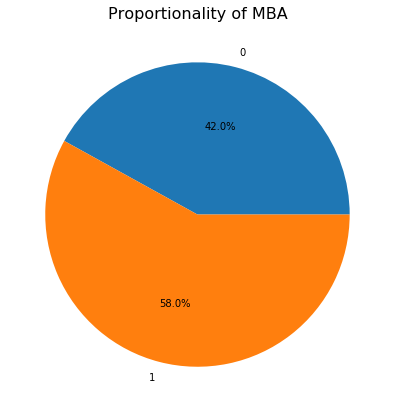

In [0]:
data_pie = data.groupby(["MBA?"])["CEO"].count()
ax = data_pie.plot(kind="pie", figsize=(7,7), autopct="%1.1f%%")
ax.set_title("Proportionality of MBA", size=16)
ax.set_ylabel("")

Ok nice ! But why using the `.groupby` operation ?

This operation will help us to select the values of our `dataframe` but with a separation in the CEO who have and the ones who don't have an MBA !

and then we need to `.count()` the **CEO**. (`.count()` count the number of row)

In [0]:
data_pie.head()

MBA?
0    47
1    65
Name: CEO, dtype: int64

##3. Barplot

This kind of chart is another way to visualize the proportionality of data. \
In our case, we want to see the number of CEO with an MBA !

Text(0, 0.5, 'number of CEO')

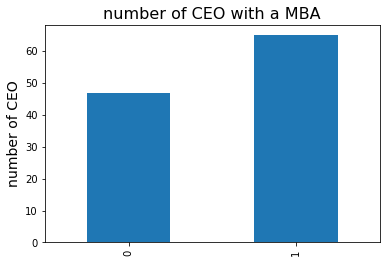

In [0]:
data_bar = data.groupby(["MBA?"])["CEO"].count()
ax = data_bar.plot(kind="bar") #"bar" vertical ploting
ax.set_title("number of CEO with a MBA", size=16)
ax.set_xlabel("", size=14)
ax.set_ylabel("number of CEO", size=14)

Let's do it **horizontally.**

Text(0, 0.5, '')

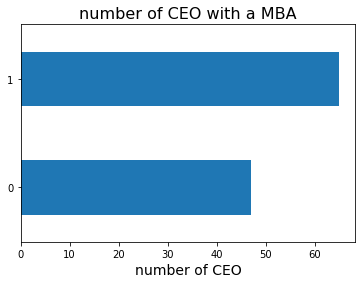

In [0]:
data_bar = data.groupby(["MBA?"])["CEO"].count()
ax = data_bar.plot(kind="barh") #something a little different here ;)
ax.set_title("number of CEO with a MBA", size=16)
ax.set_xlabel("number of CEO", size=14)
ax.set_ylabel("", size=14)

##4. Barplot using Seaborn
In this exemple, we use the `seaborn` package. To visualize the 20 cities where the largest number of CEOs were born.


<Figure size 1152x864 with 0 Axes>

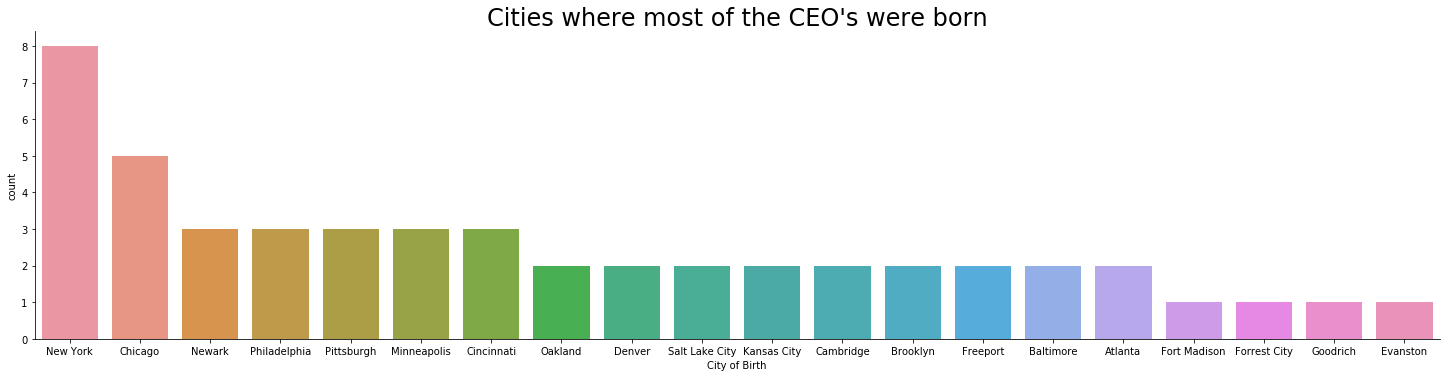

In [0]:
listeOrder = data.groupby(["City of Birth"])["CEO"].nunique().sort_values(ascending=False).index.tolist() #give us a list with: a count of the number of CEO by place of birth. This list is sorted "descending" 
fig = plt.gcf() #the aera of the plt figure
fig.set_size_inches(16, 12) #resize the figure
sns.catplot(kind="count", data=data, x="City of Birth", height=5, aspect=4, order=listeOrder[:20] ) #The ploting and the selection are here !
plt.title("Cities where most of the CEO's were born",fontsize=24) #title configuration
plt.show() 

###**STOP HERE !!!**
let's see how it work.
```python
sns.catplot(kind="count", data=data, x="City of Birth", height=5, aspect=4, order=listeOrder[:20] ) #The ploting and the selection are here !
```

here we can see that the sementics is a bit different than before ! \


*   `kind=` : gave us the type of plot we want.
*   `data=` : ask us the name of the dataframe.
*   `x=` : the name of the variable
*   `high=` and `aspect=`: basically the size
*   `order=`: in what kind of order we want the bars according to a list.

if you want/need more information, you can find the datasheet here
[here](https://seaborn.pydata.org/generated/seaborn.catplot.html)



##5. Boxplot
This kind of chart is another way to visualize the variance of data.\
In this a boxplot we can see:


*   minimum
*   maximum
*   median
*   mean
*   quartiles
*   outliers



In our case, we want to see the `Age` of the CEO's !

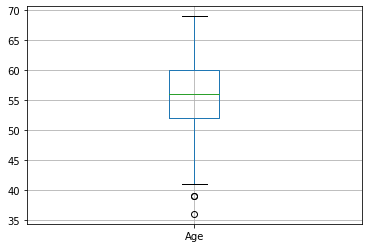

In [0]:
data.boxplot(column="Age")

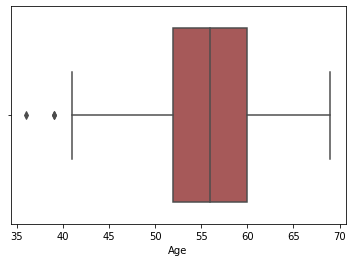

In [0]:
sns.boxplot(x=data["Age"],color="r", saturation=0.3)

If we need the numerical values, it's possible to use `.describe()`

In [0]:
data["Age"].describe()

count    112.000000
mean      55.491071
std        6.187747
min       36.000000
25%       52.000000
50%       56.000000
75%       60.000000
max       69.000000
Name: Age, dtype: float64

## 6. Scatter Plot and lines


### 6.1 Scatter plot
This kind of chart is good way to visualize the correlation between inputs.

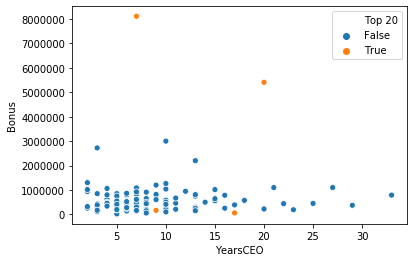

In [0]:
sns.scatterplot(x=data["YearsCEO"], y=data["Bonus"],hue=data["Top 20"]) #TIPS => "hue=" will help you to "separate" visualy the data. (orange and blue in our case)

###6.2 Lines plot
They are use to reprensent evolution of a value in function of an other one. (like the time for exemple)

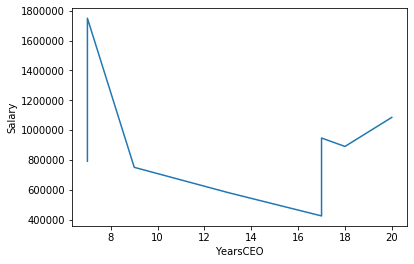

In [0]:
sns.lineplot(x=data["YearsCEO"], y=data.groupby("YearsCEO")["Salary"].max(), estimator=None) 

###6.3 Distribution plot
`.displot()` from `seaborn` help us to visualize the statistical distribution of a variable.\
 With it, it's possible to visualize what is the shape of the distribution.

 in our case, we could see that the distribution of `Age` *looks like* a **Normal distribution**.

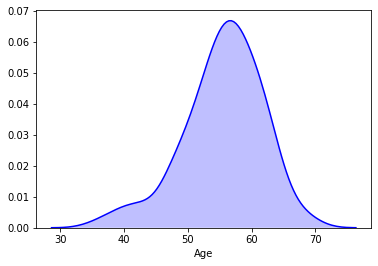

In [0]:
sns.distplot(data["Age"], hist=False, color="b", kde_kws={"shade": True})

 ### 6.4 Kernel density plot
 `.kdplot()` from `seaborn` help us to visulaize the kernel density of the variable.

 In our case, this is the kernel density of `Age` who belong to the distribution above.

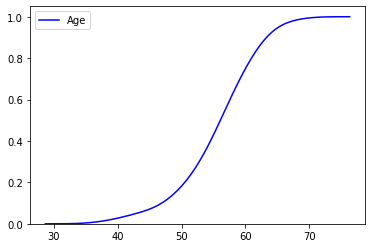

In [0]:
sns.kdeplot(data["Age"], color="b", cumulative=True)

## Pair Grid or "how to find correlations ?"

***I think that everything is in the title. ;)***

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:98: UserWarning: The handle <matplotlib.patches.Patch object at 0x7fa2aea50d68> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self.fig.legend(handles, labels, **kwargs)


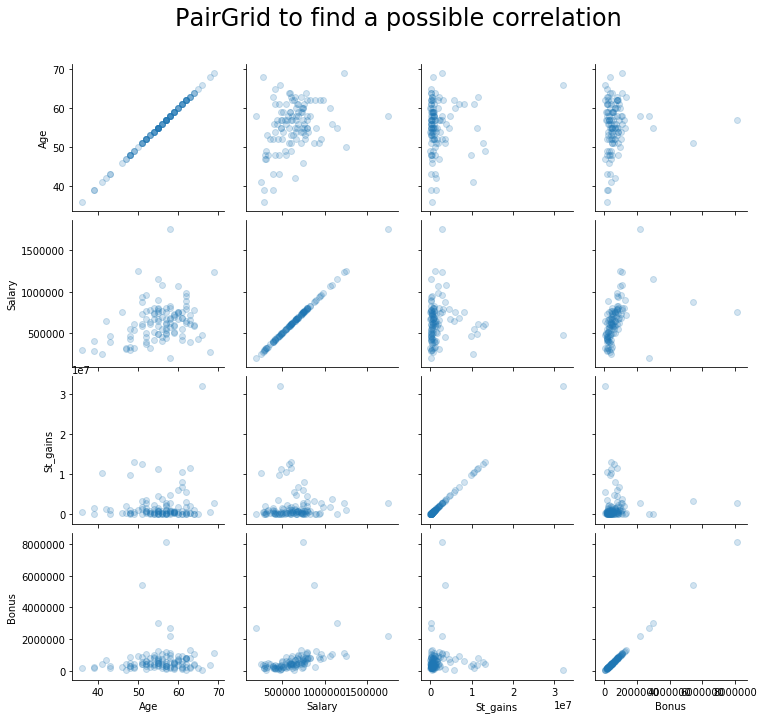

In [0]:
g = sns.PairGrid(data, vars=['Age', 'Salary', 'St_gains', 'Bonus'],
                 palette='pale red')
g.map(plt.scatter, alpha=0.2)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('PairGrid to find a possible correlation', size=24)
g.add_legend();